In [1]:
#Necessary imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from Decision_Tree import HomemadeDecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from Decision_Tree import HomemadeDecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import tree
import time
from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from matplotlib import image

# Homemade Decision Tree algorithms

Run the present file to test the implemented decision trees algorithms in file 'Decision_Tree.py' on 4 datasets.

This will print the performance and runtime. Our algorithms are compared with sklearn's implementation and are consistently more performant but slower.

We also included our algorithm to part A (Airbnb dataset). See files  'global_results.ipynb' and 'models/decision_tree_from_scratch.ipynb' to see the obtained result. Again, our decision tree regressor performed better than sklearn's on that dataset too.

The trees are also saved in png format for better reading experience.

## Classification Task

In [13]:
def run_classification(data):
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # custom decision tree classifier performance

    start = time.time()
    clf = HomemadeDecisionTreeClassifier(max_depth=6)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    end = time.time()

    def accuracy(y_test, y_pred):
        return np.sum(y_test == y_pred) / len(y_test)

    acc = accuracy(y_test, predictions)
    print(f"The accuracy for the custom DT model is {acc} and the time taken is {end-start}")

    clf.visualize_tree(feature_names=data.feature_names)

    # sklearn decision tree classifier performance

    start = time.time()
    clf = tree.DecisionTreeClassifier(random_state=42, max_depth = 6)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    end = time.time()

    acc = accuracy(y_test, predictions)
    print(f"The accuracy for the sklearn DT model is {acc} and the time taken is {end-start}")

    plt.figure(figsize=(60,100))
    img = image.imread('tree.png')
    plt.imshow(img)
    plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
    plt.show()

--- Digits Dataset ---
The accuracy for the custom DT model is 0.8555555555555555 and the time taken is 3.377816915512085
The accuracy for the sklearn DT model is 0.7666666666666667 and the time taken is 0.021477937698364258


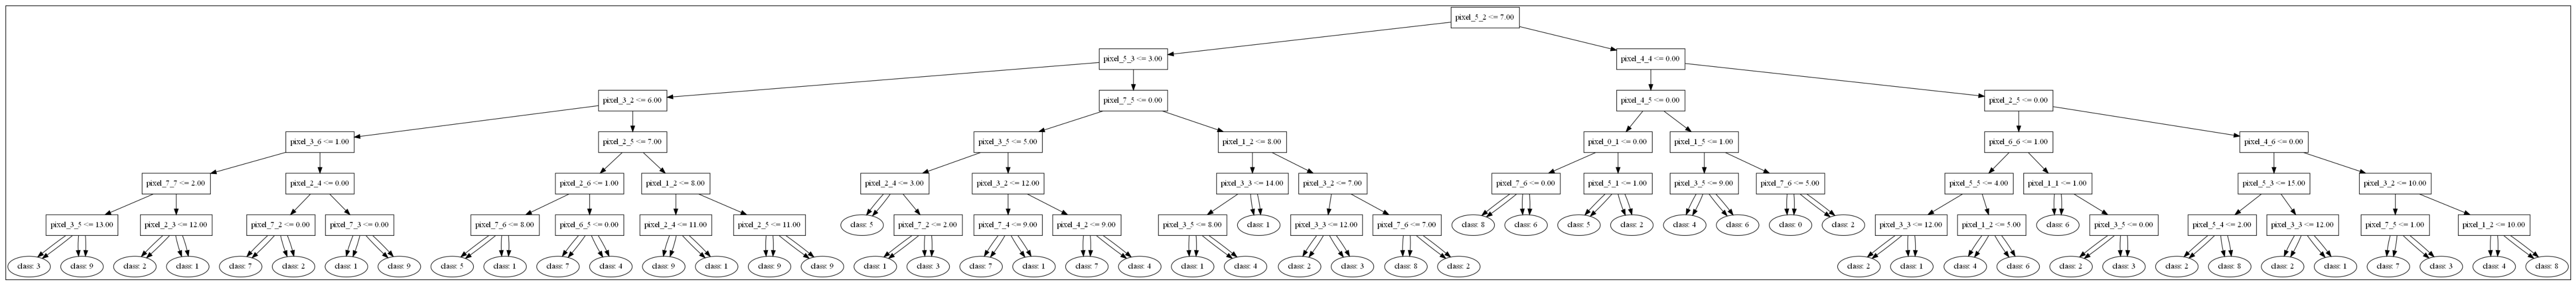

In [14]:
print('--- Digits Dataset ---')
run_classification(load_digits())

--- Iris Dataset ---
The accuracy for the custom DT model is 1.0 and the time taken is 0.08167481422424316
The accuracy for the sklearn DT model is 1.0 and the time taken is 0.002256155014038086


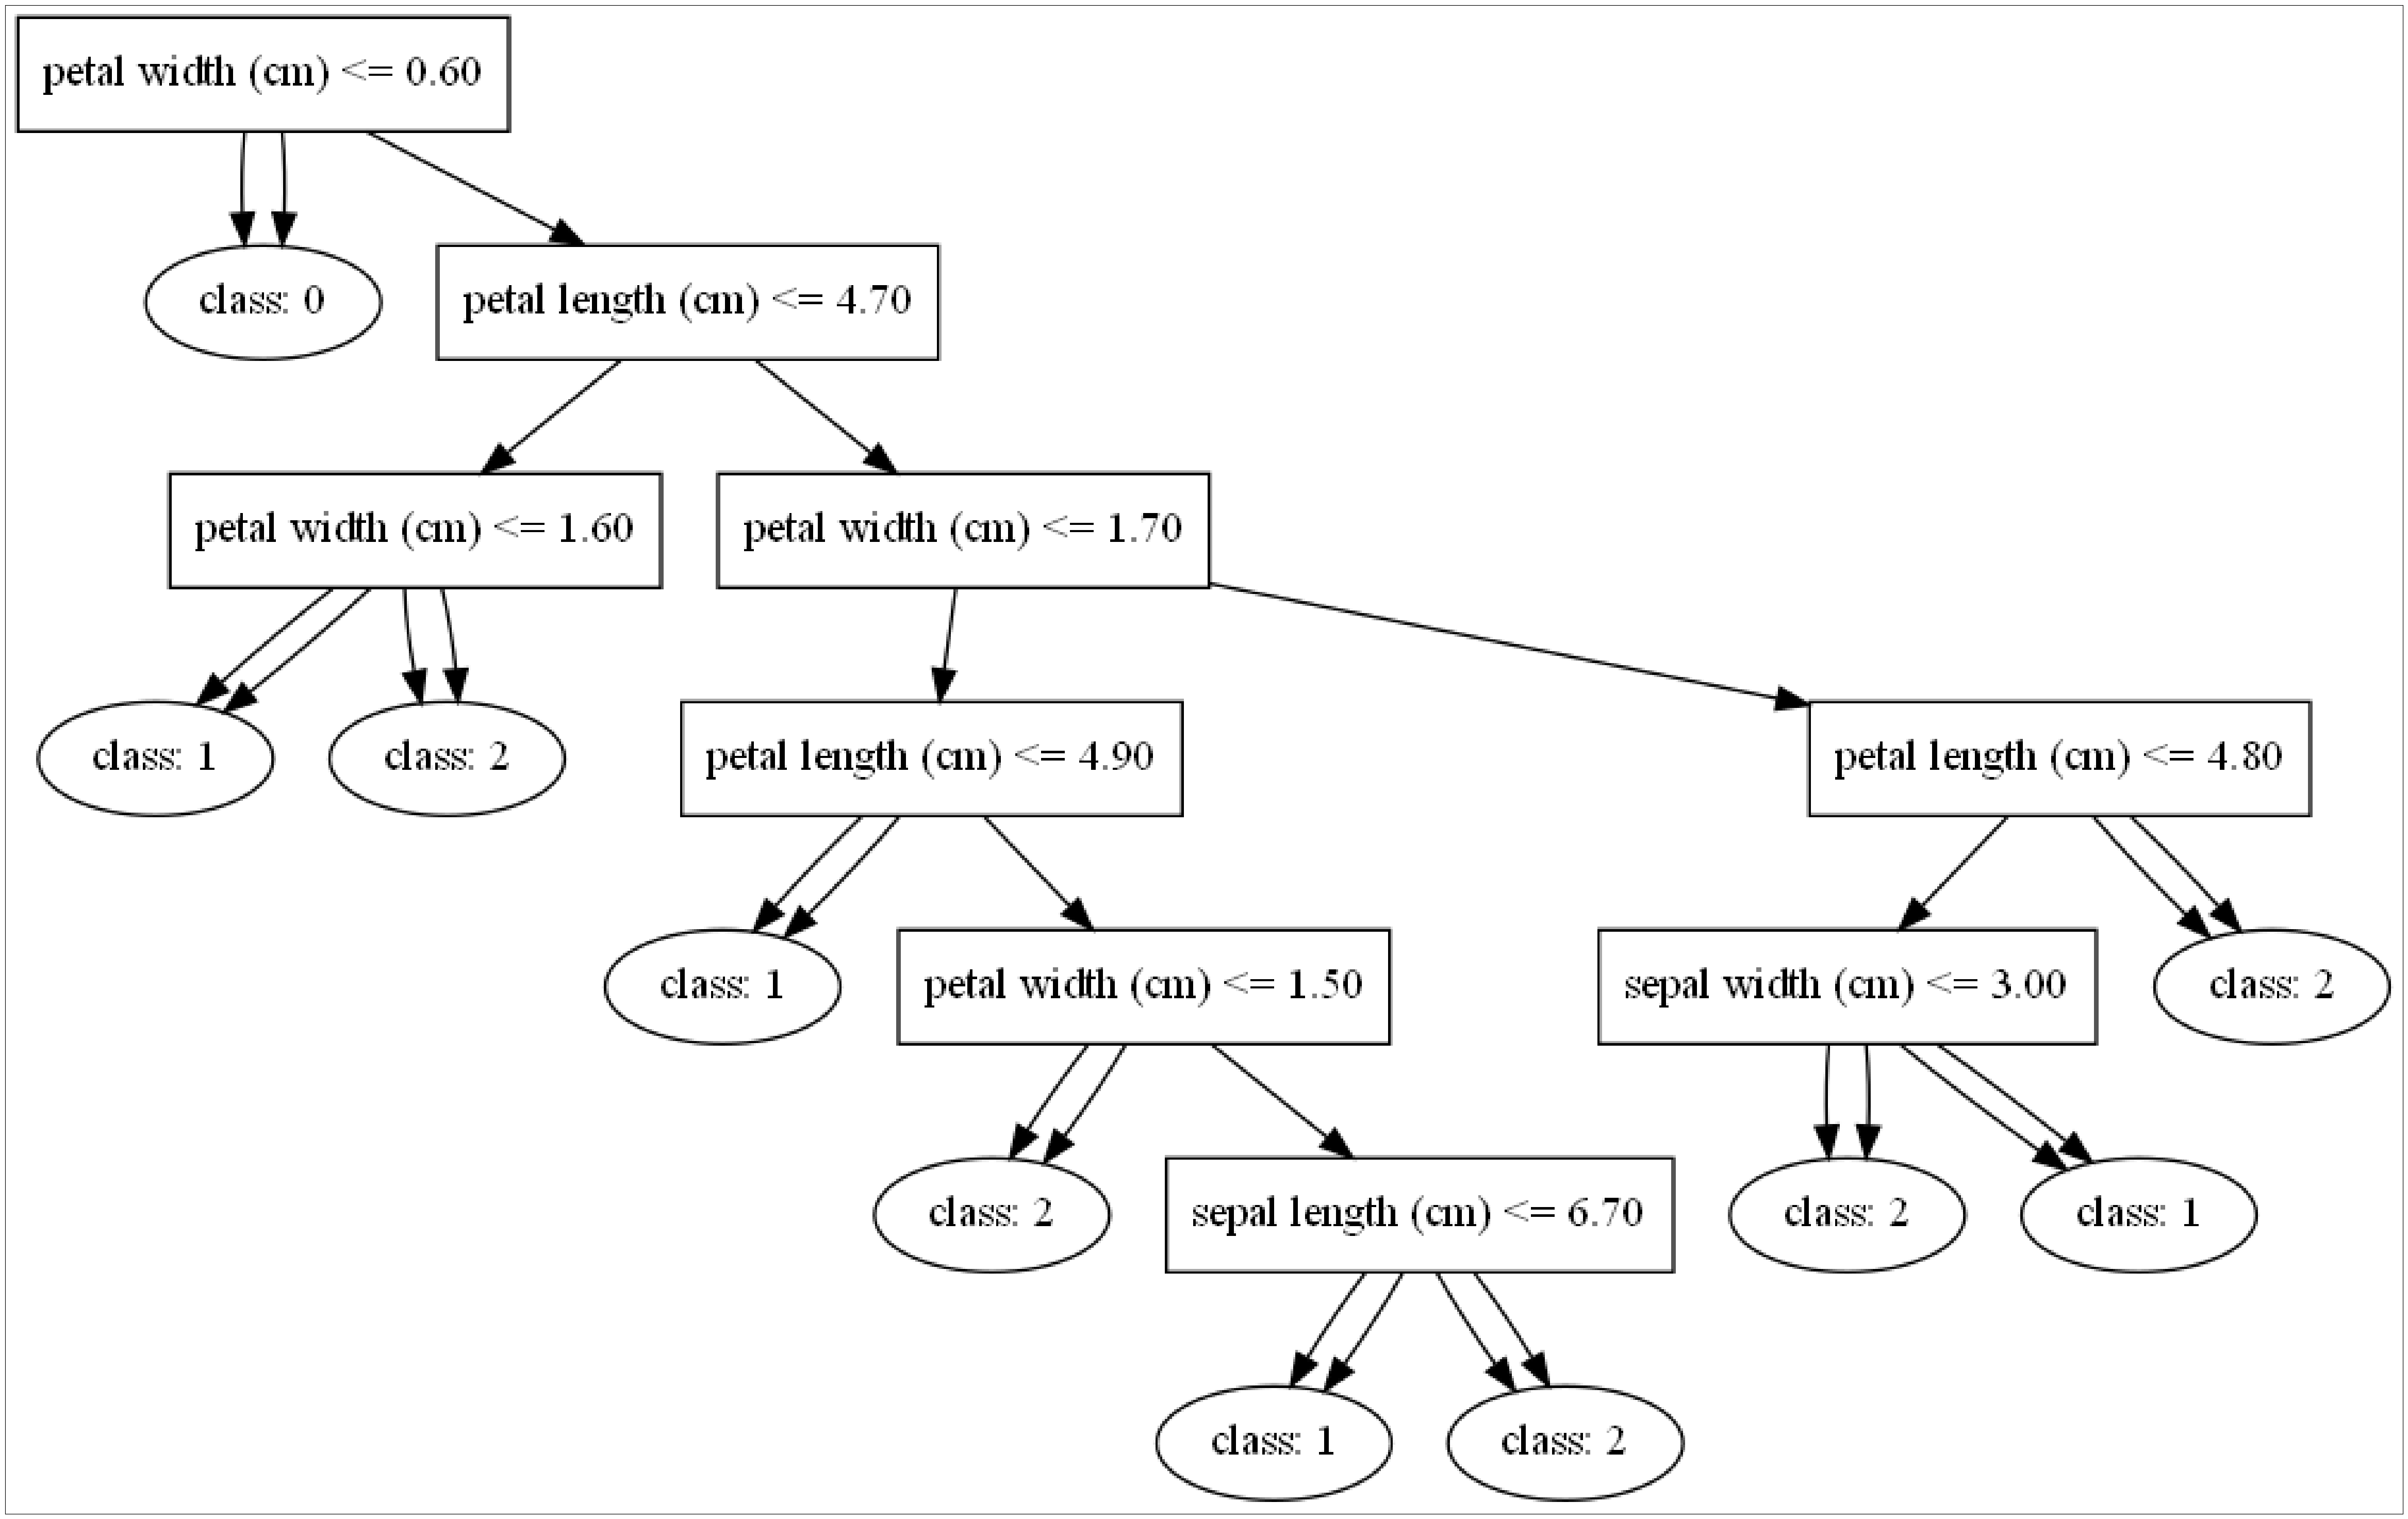

In [15]:
print('--- Iris Dataset ---')
run_classification(load_iris())

## Regression Task

In [5]:
def run_regression(data_reg):
    X, y = data_reg.data, data_reg.target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

    # Train a decision tree regressor on the training set & Evaluate the model on the testing set
    start = time.time()
    dt = HomemadeDecisionTreeRegressor(max_depth=3, min_samples_split=12)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    end = time.time()


    rmse = mean_squared_error(y_test, y_pred,squared=False)
    print(f"The RMSE for the custom DT Regressor model is {rmse} and the time taken is {end-start}")
    #checking with the sklearn decision tree


    r2 = r2_score(y_test, y_pred)
    print(f"The R2_Score for the custom DT Regressor model is {r2} and the time taken is {end-start}")

    dt.visualize_tree_reg(feature_names=data_reg.feature_names)

    #Check this against SKLearn DT Regressor
    start = time.time()
    clf = tree.DecisionTreeRegressor(max_depth=3, min_samples_split=12,random_state=40)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    end = time.time()

    rmse = mean_squared_error(y_test, y_pred,squared = False)
    print(f"The RMSE for the SKlearn DT model is {rmse} and the time taken is {end-start}")

    r2 = r2_score(y_test, y_pred)
    print(f"The R2_Score for the Sklearn DT model is {r2} and the time taken is {end-start}")

    plt.figure(figsize=(60,100))
    img = image.imread('tree_r.png')
    plt.imshow(img)
    plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
    plt.show()

--- Diabetes Dataset ---
The RMSE for the custom DT Regressor model is 66.0774879035389 and the time taken is 0.38396406173706055
The R2_Score for the custom DT Regressor model is 0.2712289493955993 and the time taken is 0.38396406173706055
The RMSE for the SKlearn DT model is 67.88231734179699 and the time taken is 0.001993894577026367
The R2_Score for the Sklearn DT model is 0.23087419222095762 and the time taken is 0.001993894577026367


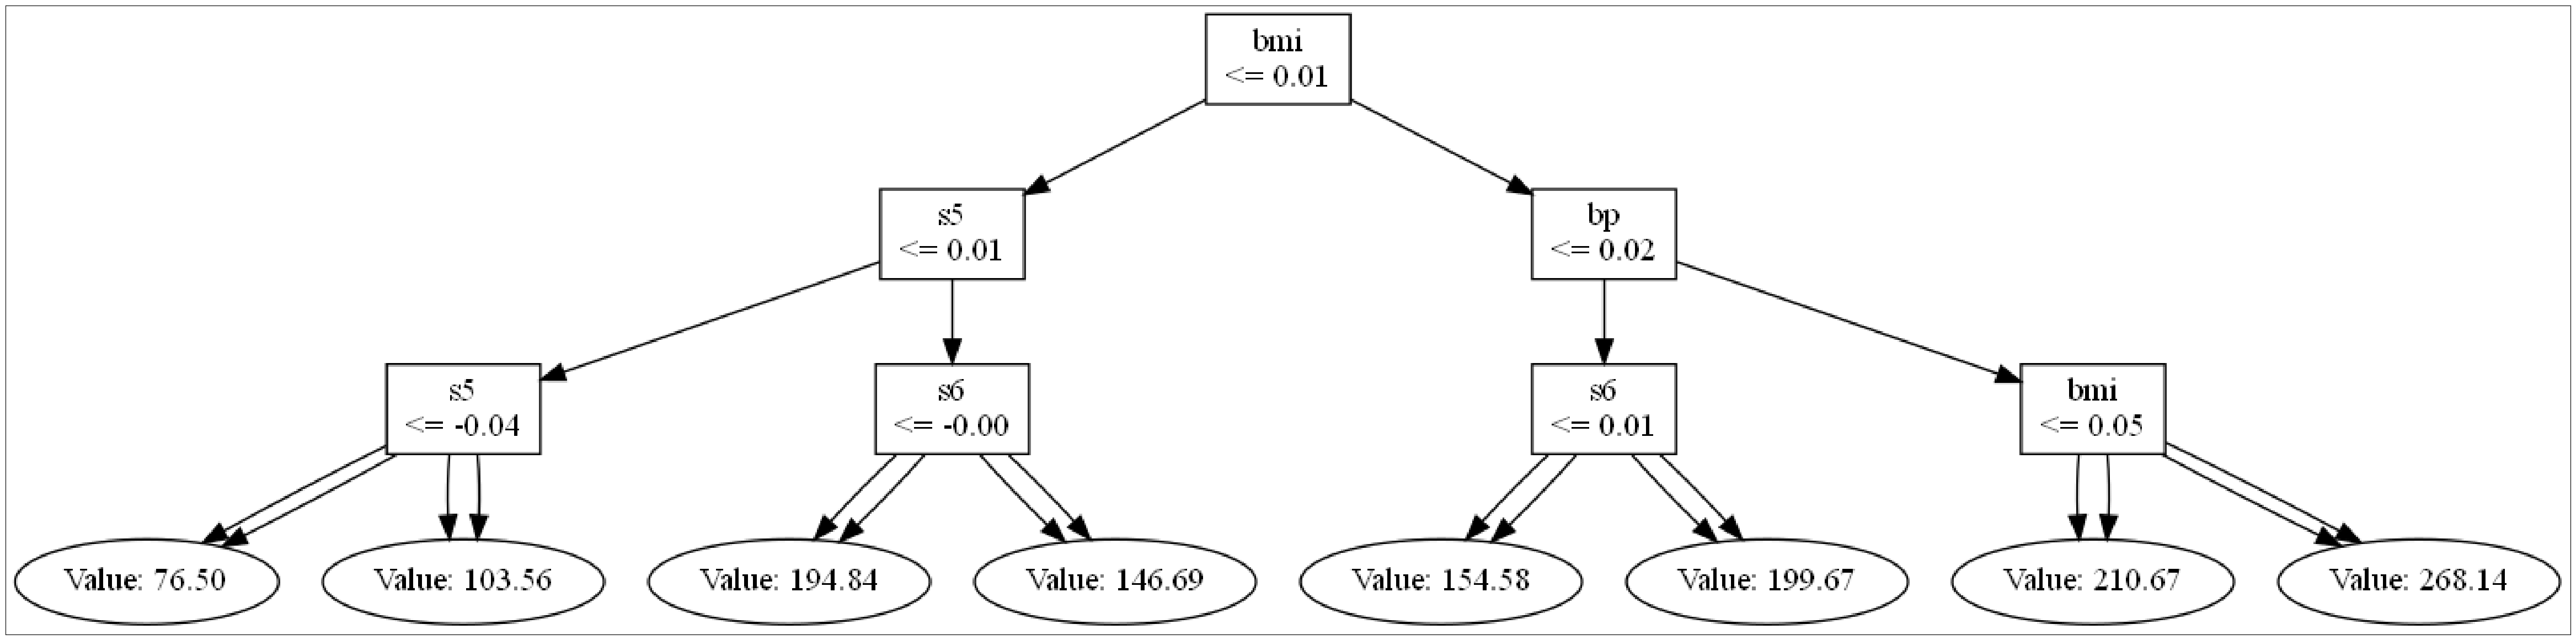

In [6]:
print('--- Diabetes Dataset ---')
run_regression(load_diabetes())

--- California Housing Dataset ---
The RMSE for the custom DT Regressor model is 0.8087444781401479 and the time taken is 86.95349502563477
The R2_Score for the custom DT Regressor model is 0.5084160332063525 and the time taken is 86.95349502563477
The RMSE for the SKlearn DT model is 0.8087444781401477 and the time taken is 0.05385541915893555
The R2_Score for the Sklearn DT model is 0.5084160332063529 and the time taken is 0.05385541915893555


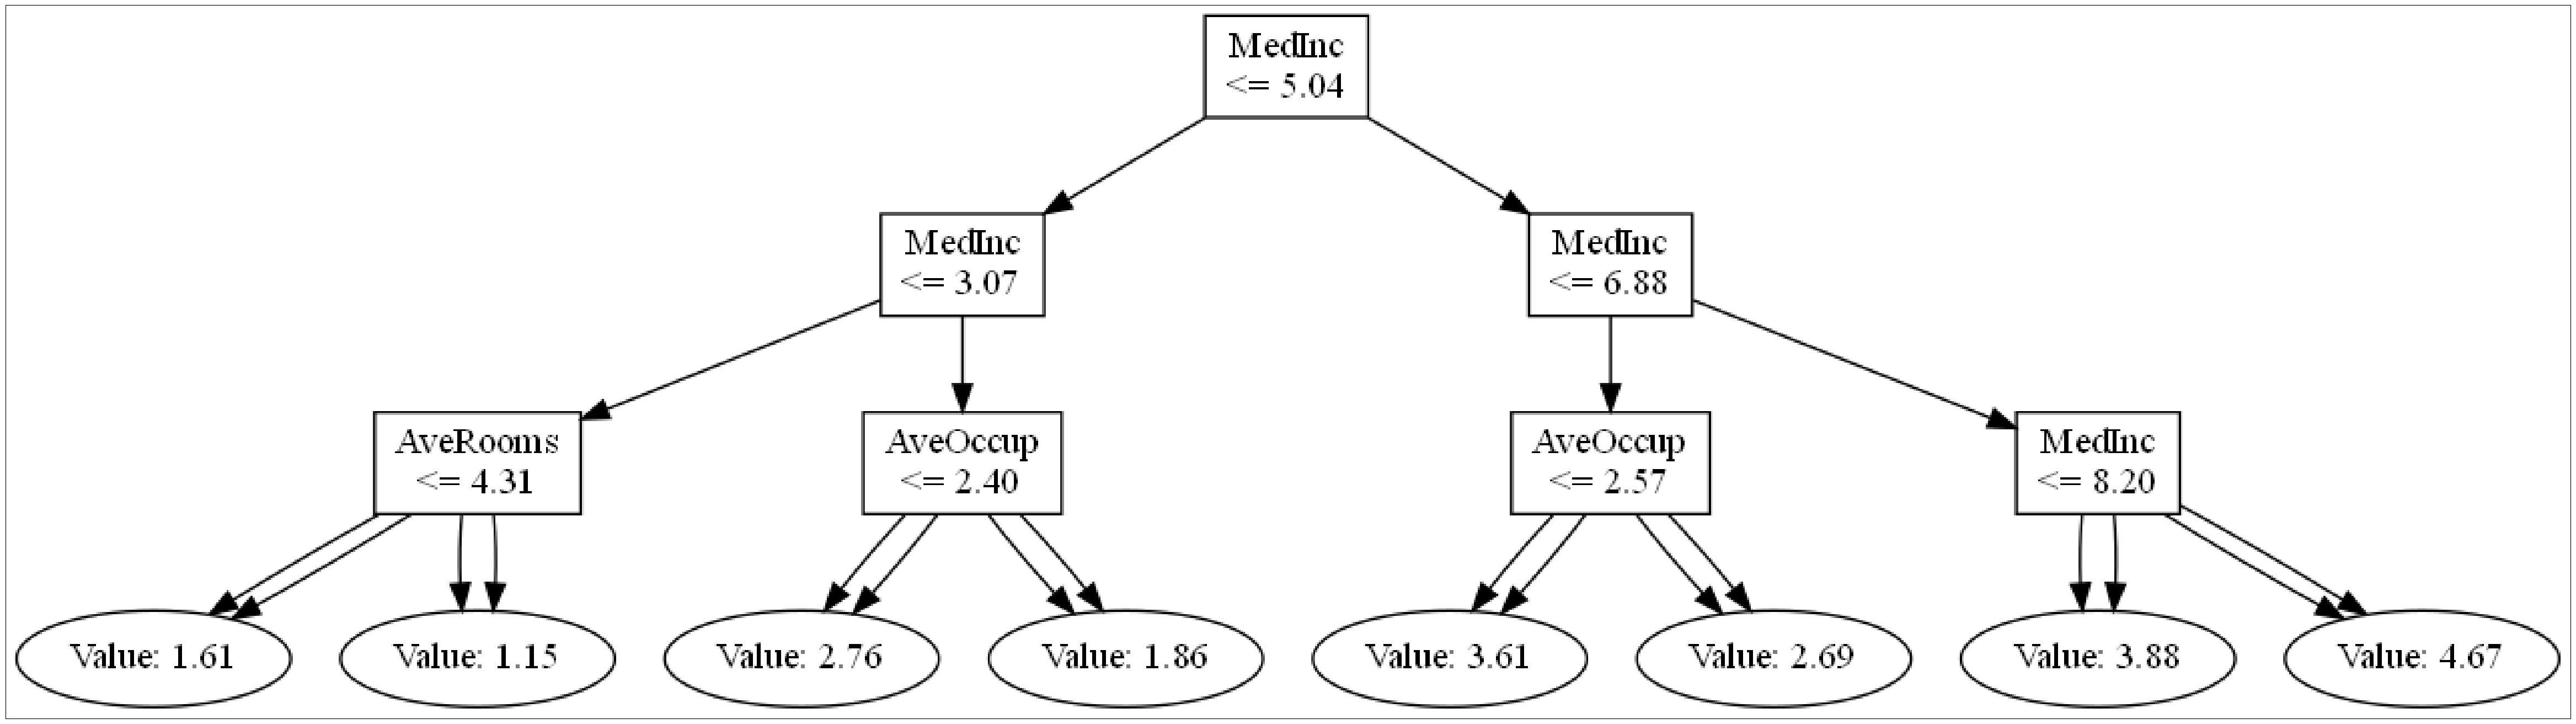

In [7]:
print('--- California Housing Dataset ---')
run_regression(fetch_california_housing())